In [ ]:
import warnings
warnings.filterwarnings('ignore')

: 

In [ ]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install matplotlib


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip available: 22.2.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



     ---------------------------------------- 7.8/7.8 MB 6.6 MB/s eta 0:00:00
     ---------------------------------------- 55.9/55.9 kB ? eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 7.8 MB/s eta 0:00:00
     -------------------------------------- 106.9/106.9 kB 6.4 MB/s eta 0:00:00
     ---------------------------------------- 2.6/2.6 MB 8.2 MB/s eta 0:00:00
     ---------------------------------------- 218.6/218.6 kB ? eta 0:00:00


In [3]:
# TensorFlow and Keras modules
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.optimizers import Adam
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [4]:
# Set dataset paths and image size
IMAGE_SIZE = [224, 224]
TRAIN_PATH = 'C:\\Users\\HP\\Desktop\\DELETE\\chest_xray\\chest_xray\\train'
VALID_PATH = 'C:\\Users\\HP\\Desktop\\DELETE\\chest_xray\\chest_xray\\test'

In [5]:
# Load the VGG16 model without the top layers and with pre-trained ImageNet weights
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [6]:
# Freeze all the layers of VGG16
for layer in vgg.layers:
    layer.trainable = False

In [7]:
# Adding custom layers on top of VGG16
folders = glob(f'{TRAIN_PATH}/*')  # Get class folders
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)  # Output layer

In [8]:
# Build the model
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │        50,178 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,764,866 (56.32 MB)

 Trainable params: 50,178 (196.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [9]:
# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.0001),
    metrics=['accuracy']
)

In [10]:
# Image data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

valid_datagen = ImageDataGenerator(rescale=1./255)

In [11]:
# Load training and validation datasets
train_set = train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=IMAGE_SIZE,
    batch_size=32,
    class_mode='categorical'
)

valid_set = valid_datagen.flow_from_directory(
    VALID_PATH,
    target_size=IMAGE_SIZE,
    batch_size=32,
    class_mode='categorical'
)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [12]:
# Train the model
history = model.fit(
    train_set,
    validation_data=valid_set,
    epochs=12,  # Use more epochs as needed
    steps_per_epoch=len(train_set),
    validation_steps=len(valid_set)
)

Epoch 1/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 338s 2s/step - accuracy: 0.8508 - loss: 0.3692 - val_accuracy: 0.8413 - val_loss: 0.3667
Epoch 2/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 330s 2s/step - accuracy: 0.9459 - loss: 0.1571 - val_accuracy: 0.8766 - val_loss: 0.3187
Epoch 3/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 344s 2s/step - accuracy: 0.9549 - loss: 0.1323 - val_accuracy: 0.9038 - val_loss: 0.2588
Epoch 4/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 337s 2s/step - accuracy: 0.9538 - loss: 0.1260 - val_accuracy: 0.9006 - val_loss: 0.2832
Epoch 5/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 342s 2s/step - accuracy: 0.9615 - loss: 0.1060 - val_accuracy: 0.9103 - val_loss: 0.2590
Epoch 6/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 332s 2s/step - accuracy: 0.9606 - loss: 0.1108 - val_accuracy: 0.8942 - val_loss: 0.2962
Epoch 7/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 329s 2s/step - accuracy: 0.9685 - loss: 0.0970 - val_accuracy: 0.9151 - val_loss: 0.2443
Epoch 8/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 334s 2s/step - accuracy: 0.9691 - loss: 0.0905 - val_accu

In [13]:
# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(valid_set, verbose=1)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy*100:.2f}%")

20/20 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.8992 - loss: 0.2855
Validation Loss: 0.2441
Validation Accuracy: 91.03%


In [14]:
# Save the model
model.save('chest_xray_vgg16.h5')

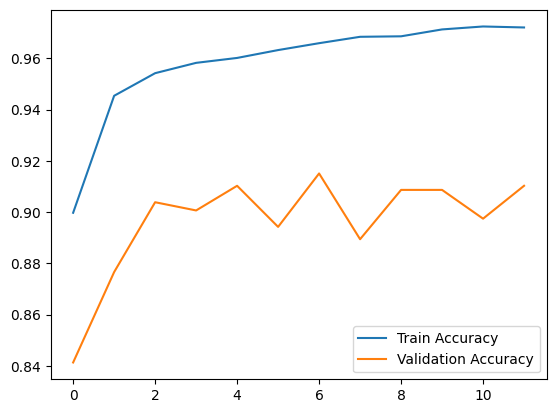

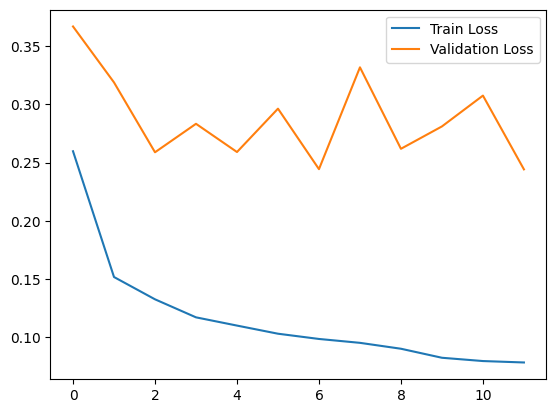

In [15]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


In [16]:
# Load and preprocess a single image for prediction
def predict_image(model_path, image_path):
    model = load_model(model_path)
    img = load_img(image_path, target_size=IMAGE_SIZE)
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x / 255.0  # Rescale the image
    
    prediction = model.predict(x)
    class_idx = np.argmax(prediction, axis=1)[0]
    class_label = list(train_set.class_indices.keys())[class_idx]
    return class_label, prediction

In [22]:
# Example usage of the prediction function
image_path = 'C:\\Users\\HP\\Desktop\\DELETE\\Untitled.jpg'
label, prediction = predict_image('chest_xray_vgg16.h5', image_path)
print(f'Predicted Label: {label}, Prediction Probabilities: {prediction}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step
Predicted Label: PNEUMONIA, Prediction Probabilities: [[0.34676817 0.6532319 ]]
